## <center> Анализ игровой индустрии </center>
___
### <center> Сборный проект </center>
___
___

### Описание проекта

___
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
___
___

### Состав проекта  <a id = 'back'></a>
___
[1. Шаг 1. Ознакомление с данными](#step_1)   
   
   - [1.1. Информация о датафрейме](#1.1.)
   - [1.2. Данные для изменения](#1.2.)
   - [1.3. Изучение пропусков](#1.3.)
   
[2. Шаг 2. Подготовка данных](#step_2)   

   - [2.1. User score](#2.1.)
   - [2.2. Обработка пропусков](#2.2.)
   
[3. Шаг 3. Исследовательский анализ данных](#step_3)   

   - [3.1. Обзор игр](#3.1.)
   
[4. Шаг 4. Портрет пользователя регионов NA, EU, JP](#step_4)   

   - [4.1. Топ платформ по регионам](#4.1.)
   - [4.2. Топ жанров по регионам](#4.2.)
   - [4.3. Влияние рейтинга ESBR на продажи в отдельном регионе](#4.3.)
   
[5. Шаг 5. Проверка гипотез](#step_5)   

   - [5.1. Средние пользовательские рейтинги Xbox One и PC](#5.1.)
   - [5.2. Cредние пользовательские рейтинги жанров Action и Sports](#5.2.)

[6. Шаг 6. Общий вывод](#step_6) 
   
___
___

### Описание данных
___

 - *'Name'* — название игры   
 - *'Platform'* — платформа   
 - *'Year_of_Release'* — год выпуска   
 - *'Genre'* — жанр игры   
 - *'NA_sales'* — продажи в Северной Америке (миллионы долларов)   
 - *'EU_sales'* — продажи в Европе (миллионы долларов)   
 - *'JP_sales'* — продажи в Японии (миллионы долларов)   
 - *'Other_sales'* — продажи в других странах (миллионы долларов)   
 - *'Critic_Score'* — оценка критиков (максимум 100)
 - *'User_Score'* — оценка пользователей (максимум 10)   
 - *'Rating'* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.    

___
___

# <center> ВЫПОЛНЕНИЕ ПРОЕКТА </center>
___
___
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings('ignore')

___
<a id = 'step_1'></a>
### Шаг 1. Ознакомление с данными
___
___

In [2]:
games = pd.read_csv('/datasets/games.csv')
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


___
**1.1. Информация о датафрейме**
<a id = '1.1.'></a>

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу приведём названия столбцов к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()

In [5]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропусков много.   
Статистическая картина удовлетворительная.

[*(к содержанию)*](#back)
___

___
**1.2. Данные для изменения**
<a id = '1.2.'></a>

*'User_Score'* должен быть числового типа, как у *'Critic_Score'*. Меняем на *float64* вместо *object*.   
*'Year_of_Release'* лучше привести к *int*. Никто никогда не писал месяц релиза, даже если игра вышла 31 декабря 2019 года - это всё равно игра 2019 года. При предварительном осмотре данных видим, что после запятой каждого года стоит 0, но на всякий случай будем приводить к *int* с округлением вниз.
К остальным типам данных вопросов нет.

[*(к содержанию)*](#back)
___

___
**1.3. Изучение пропусков**
<a id = '1.3.'></a>

Визуализируем пропуски по каждой колонке.

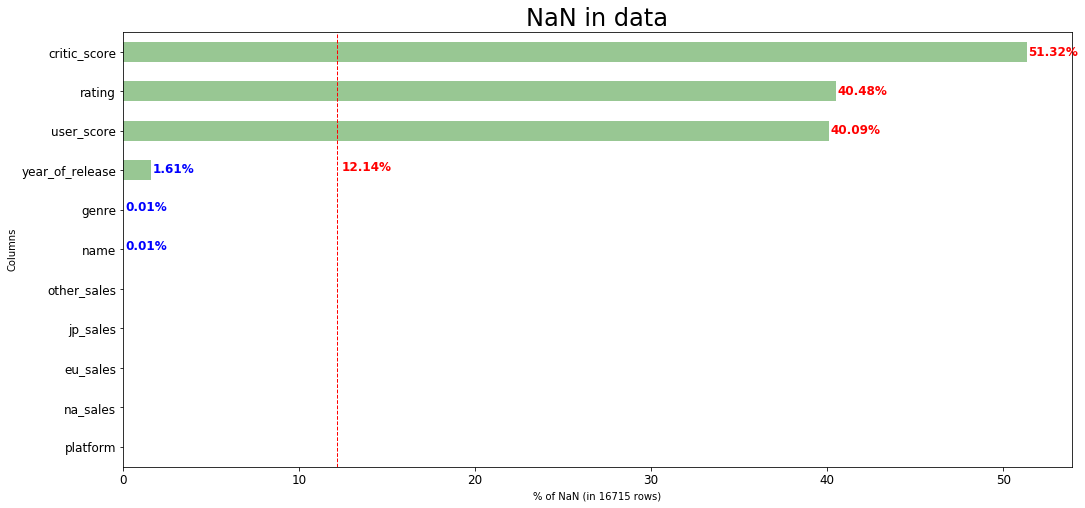

In [6]:
def percent_hbar(df, old_threshold = None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind = 'barh', figsize = (17, 8), 
                               color = '#98c793', legend = False, fontsize = 12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color = color, 
                    fontweight = 'bold', fontsize = 'large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x = old_threshold, linewidth = 1, color = 'r', linestyle = '--')
        ax.text(old_threshold + 0.3, 10, '{0:.2%}'.format(old_threshold / 100), color = 'r', fontweight = 'bold', fontsize = 'large')
        plt.axvline(x = threshold, linewidth = 1, color = 'green', linestyle = '--')
        ax.text(threshold + 0.3, 7, '{0:.2%}'.format(threshold / 100), color = 'green', fontweight = 'bold', fontsize = 'large')
    else:
        plt.axvline(x = threshold, linewidth = 1, color = 'r', linestyle = '--')
        ax.text(threshold + 0.3, 7, '{0:.2%}'.format(threshold / 100), color = 'r', fontweight = 'bold', fontsize = 'large')
    ax.set_xlabel('% of NaN (in {} rows)'.format(len(df)))
    ax.set_ylabel('Columns')
    plt.title(label = 'NaN in data', fontsize = 24)
    return ax, threshold

plot, threshold = percent_hbar(games)

In [7]:
games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Почти половина значений пропущены в стобцах `Critic_Score`, `Rating` и `User_Score`. <a id = 'conc2'></a> Среднее количество пропусков по данным примерно 12,14%, с этим надо что-то делать.

 - `critic_score` - многие игры довольно старые. Возможно в те времена ещё не было тенденции оценивать игры критиками, либо данные просто утеряны. Заполнять данные пропуски средним или медианой неправильно, так как это, скорее всего, сильно исказит действительность. Воспользуемся заполнением индикаторным значением, равным -1 (вдруг у какой-то игры рейтинг ноль). Индикаторное значение поможет при фильтрации и обработке;
 - `rating` - многие игры довольно старые. Возможно в те времена ещё не было тенденции оценивать игры критиками, либо данные просто утеряны. Заполнять данные пропуски средним или медианой невозможно: во-первых, данные представлены типом *object*; во-вторых, попытка присвоить игре рейтинг вместо ESBR сильно исказит действительность. Заполним пропуски "No rating";
 - `user_score` - многие игры довольно старые. Возможно в те времена ещё не было тенденции оценивать игры пользователями, либо это не было централизованно, либо данные просто утеряны. Заполнять данные пропуски средним или медианой неправильно, так как это, скорее всего, сильно исказит действительность. Воспользуемся заполнением индикаторным значением, равным -1 (вдруг у какой-то игры рейтинг ноль). Индикаторное значение поможет при фильтрации и обработке.
 - `year_of_release` - возможно это не самые популярные игры от не самых популярных студий. Либо просто ошибки заполнения. Как и выше - среднее или медиану применять нельзя. Заполнять индикаторным значением не стоит, чтобы не мешало анадизу данных. Оставим как есть.
 - `genre` - возможно это не самые популярные игры от не самых популярных студий. Либо просто ошибки заполнения. Как и выше - среднее или медиану применять нельзя. Заполним индикаторным значением, равным "no genre". При заполнении пропусков надо будет проверить уникальные значения, возможно там уже есть жанр "no genre" или что-то подобное.
 - `name` - возможно это не самые популярные игры от не самых популярных студий. Либо просто ошибки заполнения. Как и выше - среднее или медиану применять нельзя. Заполним индикаторным значением, равным "no name". При заполнении пропусков надо будет проверить - нет ли уже такого названия, игры могут называться как угодно.

По срезу данных не прослеживается никакая зависимость относительно появления пропусков.

[*(к содержанию)*](#back)
___

___
<a id = 'step_2'></a>
### Шаг 2. Подготовка данных
___
___

___
**2.1. User_score**
<a id = '2.1.'></a>

Тип данных этого столбца - *object*, что странно, так как числовые значения и *NaN* должны давать тип *float*.   
Посмотрим уникальные значения этого столбца.

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Присутствует *tbd*. Поиск показал что это значит *'To Be Determined'*, то есть на данный момент рейтинг игре не присвоен. Такое может быть, если для определения рейтинга недостаточно отзывов, например у малоизвестных или не совсем популярных игр.   
Раз так - можем смело менять *tbd* на -1, вместе с *NaN*.

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

[*(к содержанию)*](#back)
___

___
**2.2. Обработка пропусков**
<a id = '2.2.'></a>

In [10]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('No rating')

Проверим нет ли в колонке `genre` значения 'no genre'.

In [11]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Такое значение отсутствует, тогда заполним им пропуски.

In [12]:
games['genre'] = games['genre'].fillna('no genre')

Проверим нет ли игр с названием 'no name'.

In [13]:
games[games['name'] == 'no name']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Такое значение отсутствует, тогда заполним им пропуски.

In [14]:
games['name'] = games['name'].fillna('no name')

Перепроверим пропуски.

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Пропуски остались только в дате релиза, но, как и сказал выше - сильно нам не помешает.
Теперь с этим можно работать.

[*(к содержанию)*](#back)
___

___
<a id = 'step_3'></a>
### Шаг 3. Исследовательский анализ данных
___
___

Для дальнейшего анализа нам понадобятся данные о суммарных продажах. Добавим новую колонку.

In [16]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Далее нам придется строить много графиков, так что напишем под это функции.

<center>Прорисовка barplot-ов.</center>

In [17]:
def create_bar_plot(groupby_column, func, y = 'name', ylabel = '', xlabel = '', title = ''):
    plt.style.use('seaborn-pastel')
    ax = plt.gca()
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind = 'bar', y = y, figsize = figsize, ec = 'black', title = title)
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind = 'barh', y = y, figsize = figsize, ec = 'black', title = title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

<center>Прорисовка lineplot-ов.</center>

In [18]:
def create_line_plot(platforms = None, query = None, title = ''):
    %matplotlib inline
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('platform == @platform')
        else:
            df_to_plot = games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x = 'year_of_release', y = 'sales_total',
                                                                    style = '.-', kind = 'line', fontsize = 10,
                                                                    linewidth = 1, label = platform, ax = ax, figsize = (15,10),
                                                                    title = title)
        legend_list.append(platform)
    
    ax.set_xlabel('year_of_release')
    ax.set_ylabel('sales_total')
   
    ax.legend(legend_list, prop = {'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

<center>Прорисовка boxplot-ов.</center>

In [19]:
def create_boxplot(title = None, query_condition = None, ylims = None, ylabel = '', xlabel = ''):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column = 'sales_total', fontsize = 25, figsize = (25,10),
                                         boxprops = dict(linestyle = '-', linewidth = 5),
                                         medianprops = dict(linestyle = '-', linewidth = 5),
                                         whiskerprops = dict(linestyle = '-', linewidth = 5),
                                         capprops = dict(linestyle = '-', linewidth = 5), 
                                         notch = True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column = 'sales_total', by = by_column, fontsize = 25, figsize = (25,10),
                                         boxprops = dict(linestyle = '-', linewidth = 5),
                                         medianprops = dict(linestyle = '-', linewidth = 5),
                                         whiskerprops = dict(linestyle = '-', linewidth = 5),
                                         capprops = dict(linestyle = '-', linewidth = 5),
                                         notch = True)
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')
        ax.set_title('')
    ax.set_xlabel(xlabel, fontsize = 28, labelpad = 0.3)
    ax.set_ylabel(ylabel, fontsize = 28, labelpad = 0.5)

___
**3.1. Обзор игр**
<a id = '3.1.'></a>

Посмотрим количество игр, выпущенных в каждый год.

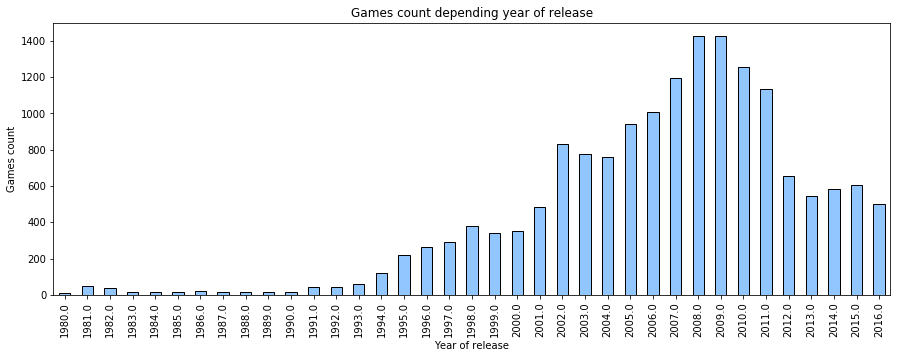

In [20]:
create_bar_plot('year_of_release', 'count', ylabel = 'Games count', xlabel = 'Year of release',
                title = 'Games count depending year of release')

Согласно <a href="https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BF%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BE%D0%B2#1990_%D0%B3%D0%BE%D0%B4">истории развития ПК</a> вполне логично увидеть, что как только персональные компьютеры стали доступны широкому кругу пользователей и их стали использовать не только для работы, но и для развлечений, так сразу и начала свое активное развитие игровая индустрия.

Посмотрим сколько игр выпускалось на разных платформах за имеющийся у нас период.

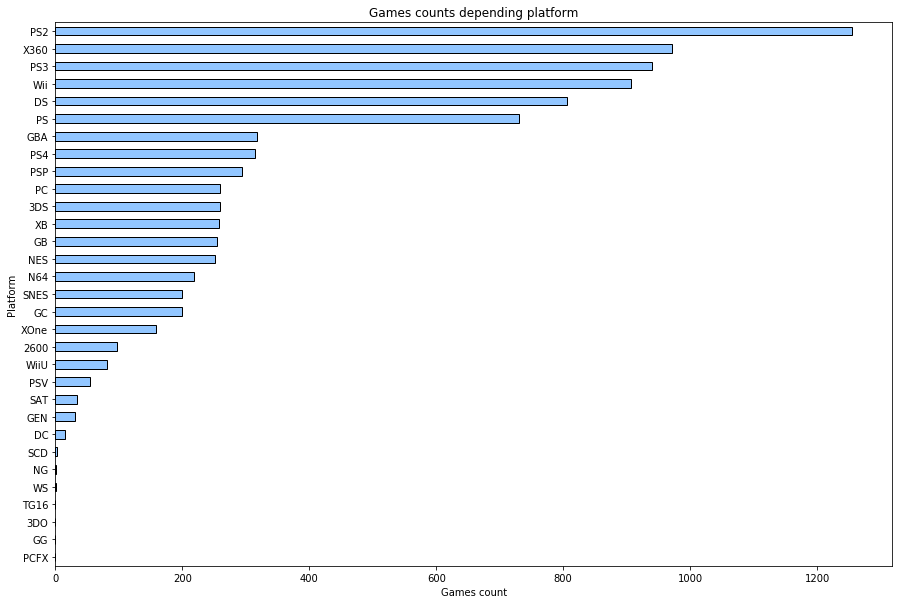

In [21]:
create_bar_plot('platform', 'sum', 'sales_total', ylabel = 'Platform', xlabel = 'Games count',
               title = 'Games counts depending platform')

Самой популярной является PS2.   
Даты выпуска шести самых популярных платформ (после 6-й, PS, большой провал по количеству игр) и их особенности:   
PS2 - 2000 год, вторая версия легендарной консоли;   
XBox360 - 2005 год, консоль от Microsoft;   
PS3 - 2006 год, третия версия легендарной консоли;   
Wii - 2006 год, инновационный контроллер Wii remote;   
DS - 2011 год, карманная консоль;   
PS - 1995 год, первая версия легендарной консоли.   
Популярность этих платформ скорее всего обусловлена инновационными, для того времени, решениями.

Оценим динамику продаж игр по годам по каждой из платформ топ-6 платформ.

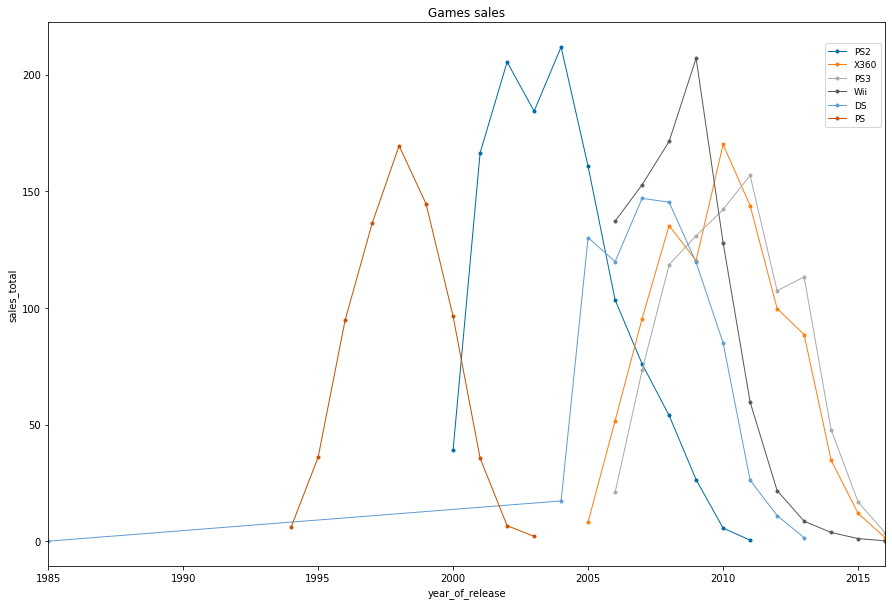

In [22]:
top_6_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
create_line_plot(platforms = top_6_platforms, title = 'Games sales')

По графикам видно что примерно через 10 лет динамика продаж игр на консоль падает, т.е. консоль изживает себя. Очевидно что вызвано это развитием технологий, появлением новых игровых платформ с новым "железом", у многиз из которых ещё есть и обратная совместимость.

<a id = 'conc3'></a>
Динамика продаж игр в наше время.   
Так как у нас данные до 2016 года, а выше мы определили жизненный цикл платформ - начнем с 2006 года.

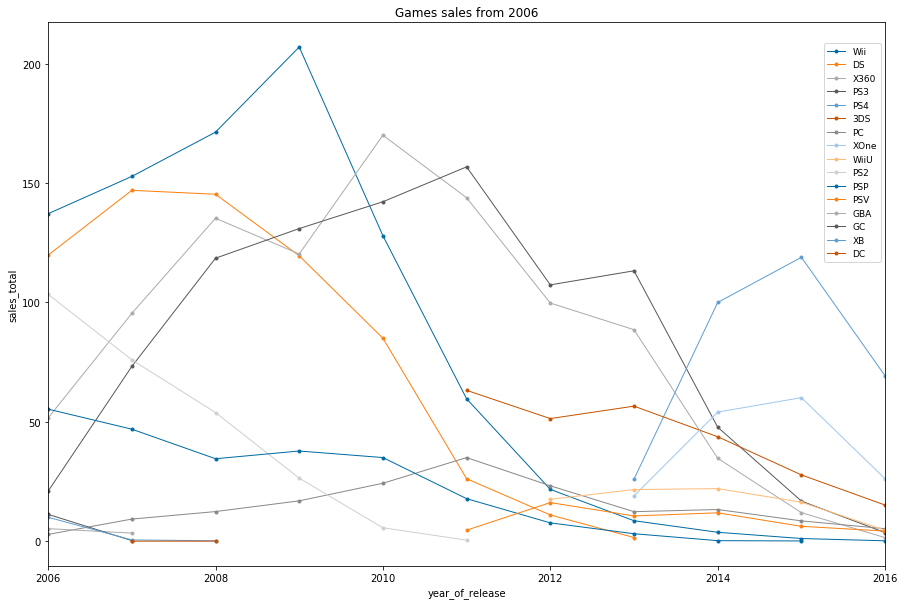

In [23]:
create_line_plot(query = 'year_of_release >= 2006', title = 'Games sales from 2006')

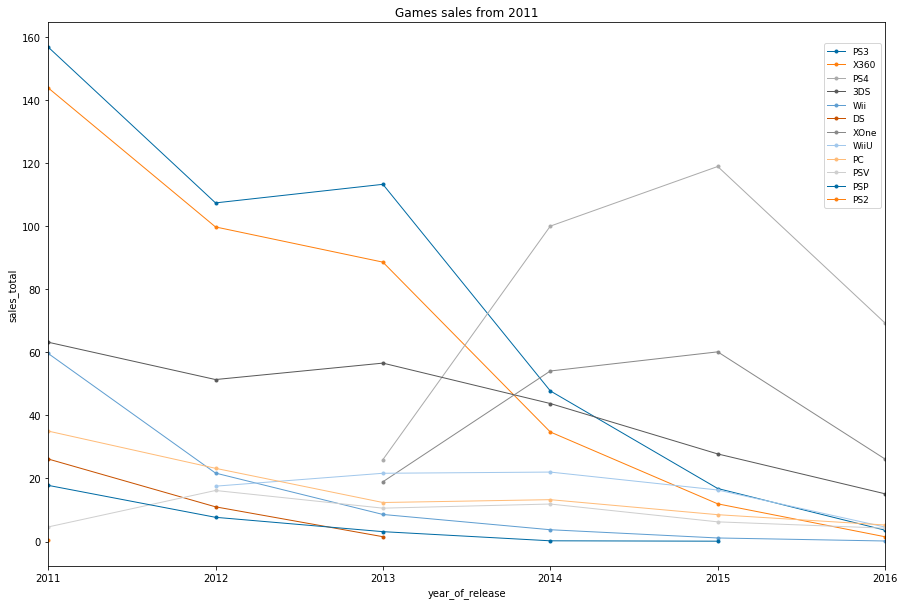

In [24]:
create_line_plot(query = 'year_of_release >= 2011', title = 'Games sales from 2011')

На конец 2016 года по продажам игр лидируют платформы:
- PS4;
- Xone;
- 3DS.

Хотя видно, что динамика продаж игр на эти платформы снижается. Это немного противоречит нашему предыдущему наблюдению о 10-ти летнем жизненном цикле игровой платформы:
- PS4 при такой тенденции должна прожить до 2017-2018 года, т.е. суммарно 4-5 лет;
- Xone - аналогично;
- 3DS - вышла чуть раньше, но с такой динамикой проживет до тех же лет, или суммарно 6-7 лет.

Возможно причина, опять же, в слишком быстром развитии технологий и снижением времени выхода новых консолей, плюс обратная совместимость. Кроме того в настоящее время все меньше эксклюзивов выходят на приставки, да и выпущенные со временем портируют на ПК, иногда даже официально.

Построим боксплоты по суммарным продажам игр.

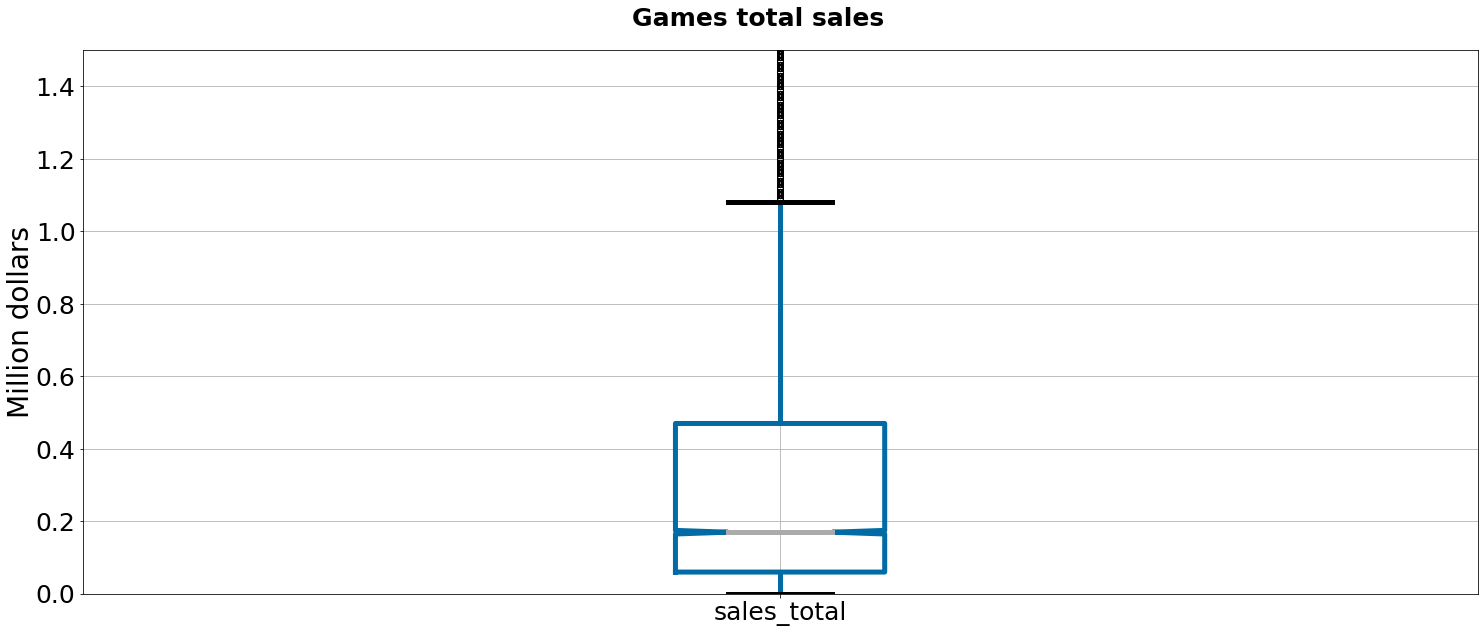

In [25]:
create_boxplot(title = 'Games total sales', ylims=[0, 1.5], ylabel = 'Million dollars')

Суммарная продажа игр примерно до 1,15 млн. долларов.   
Медиана - 0,2 млн. долларов.

Построим боксплоты по топ-6 платформам.

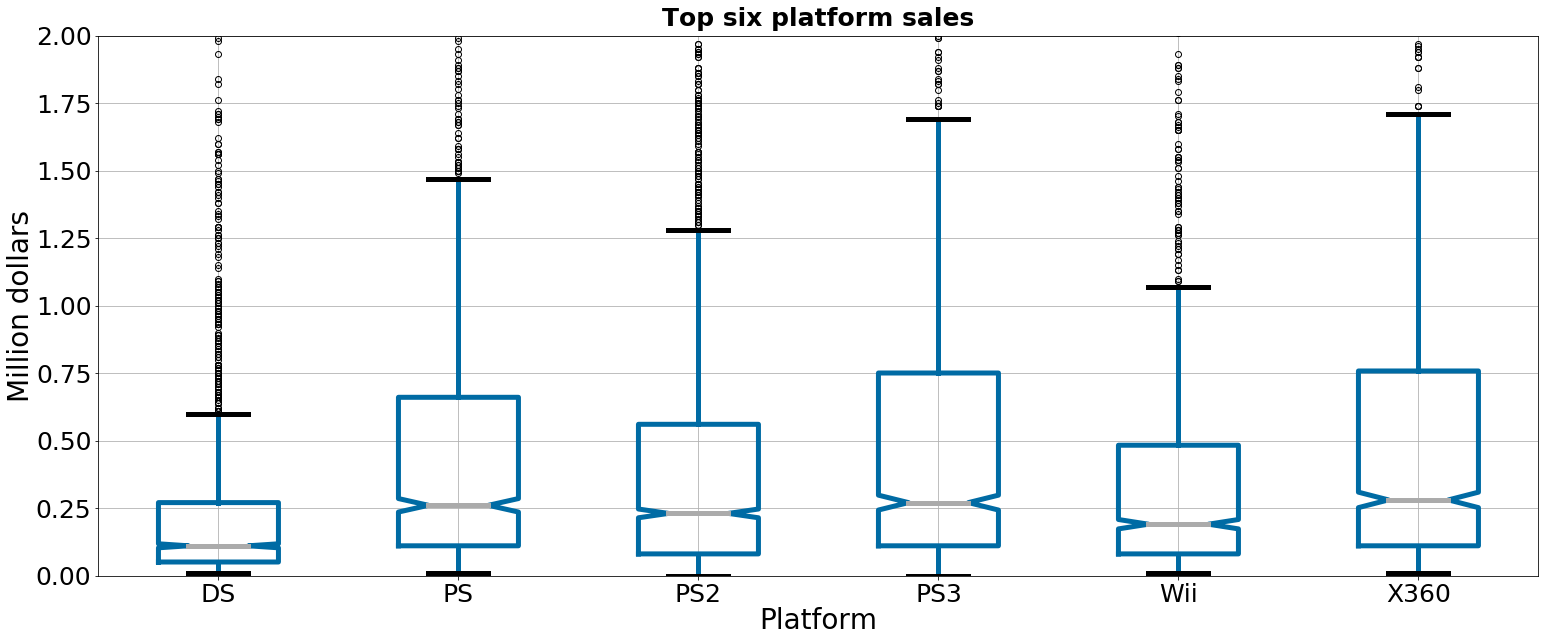

In [26]:
create_boxplot(title = 'Top six platform sales', query_condition = "platform in @top_6_platforms", ylims=[0, 2],
               ylabel = 'Million dollars', xlabel = 'Platform')

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн. долларов.
Верхняя граница у платформ PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже: медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.

Посмотрим на продажи игр по жанрам

Text(0.5, 0, 'Genre')

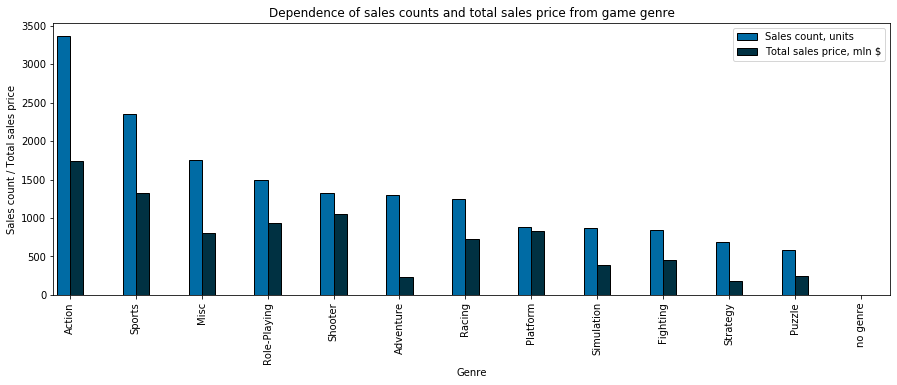

In [27]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by = 'name', ascending = False)

plot1 = pivot['name']
plot1.plot(kind = 'bar', figsize = (15,5), ec = 'black', ax = ax, width = 0.2, position = 1)

plot2 = pivot['sales_total']
plot2.plot(kind = 'bar', figsize = (15,5), ec = 'black', ax = ax, width = 0.2, color = '#003142', position = 0,
           title = 'Dependence of sales counts and total sales price from game genre')

ax.legend(['Sales count, units', 'Total sales price, mln $'])
ax.set_ylabel('Sales count / Total sales price')
ax.set_xlabel('Genre')

Топы жанров:
<center>по количеству проданных копий</center>   

 - *Action*   
 - *Sports*   
 - *Misc* (скорее всего это жанр <a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80">Miscellaneous</a> по Кроуфорду)  
 
последние места занимают:
   
   
 - *Strategy*   
 - *Puzzle*


<center>по сумме выручки</center>   

 - *Action*   
 - *Sports*   
 - *Shooter*  
 
 последние места занимают:   
 
 
 - *Strategy*   
 - *Adventure*   
 - *Puzzle*

Как говорится "причин может быть множество, последствия могут быть разными": на этот показатель может влиять оценка пользователя/критиков; стоимость разработки игры в определенном жанре; да и многие жанры не пишутся под многие платформы: вряд ли кто-то бы стал играть в SC2 на 3DS.

In [28]:
games = games.query('year_of_release >= 2011').reset_index(drop = True)

Отсекли ненужные года)

In [29]:
display(games[games['year_of_release'] < 2011])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total


In [30]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No rating,14.63
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No rating,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No rating,0.01
4018,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,No rating,0.01
4019,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No rating,0.01
4020,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No rating,0.01


Проверили что в него не попали данные 

Оценим влияние оценки пользователей и критиков на продажи игр.
Рассмотрим это влияние для платформы PS3: она не сильно старая, на конец 2016 года является одной из топовых по продажам.

Зависимость продаж от мнения критиков.

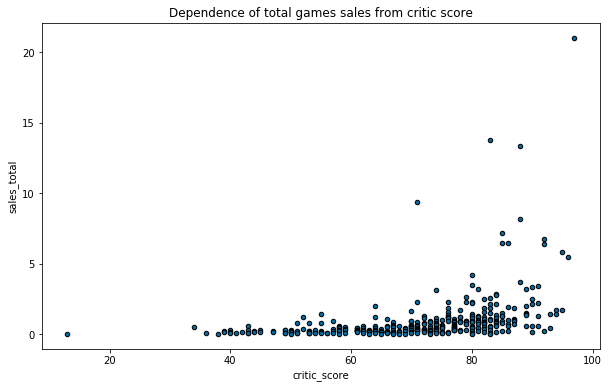

In [31]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()
games_ps3.plot(kind = 'scatter', x = 'critic_score', y = 'sales_total', ec = 'black', figsize = (10,6),
               title = 'Dependence of total games sales from critic score')

С увеличением рейтинга критиков увеличивается и уровень выручки с продажи игр. Формально - это логично. Неформально я и почти все мои знакомые предпочли бы сами оценить геймплей, либо, хотя бы, посмотреть геймплей пользователей)

Зависимость продаж от мнения пользователей.

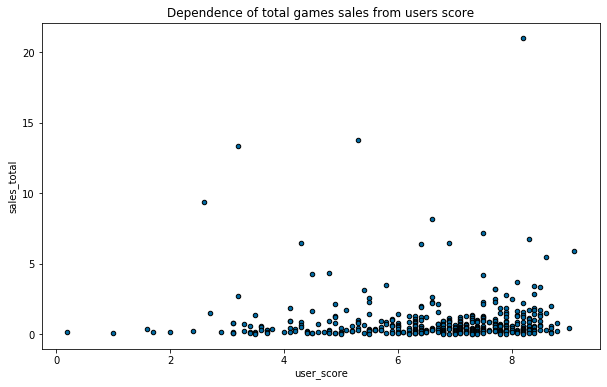

In [32]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
games_ps3.plot(kind = 'scatter', x = 'user_score', y = 'sales_total', ec = 'black', figsize = (10,6),
              title = 'Dependence of total games sales from users score')

Картина аналогична рейтингу критиков, хотя выбросов больше. Логично: пользователь должен сначала купить игру, принеся тем самым прибыль разработчику, а потом уже оставляет отзыв. Критики же часто могут получить игру и оценить её бесплатно, так как это выгодно разработчикам.

Построим матрицу корреляции.

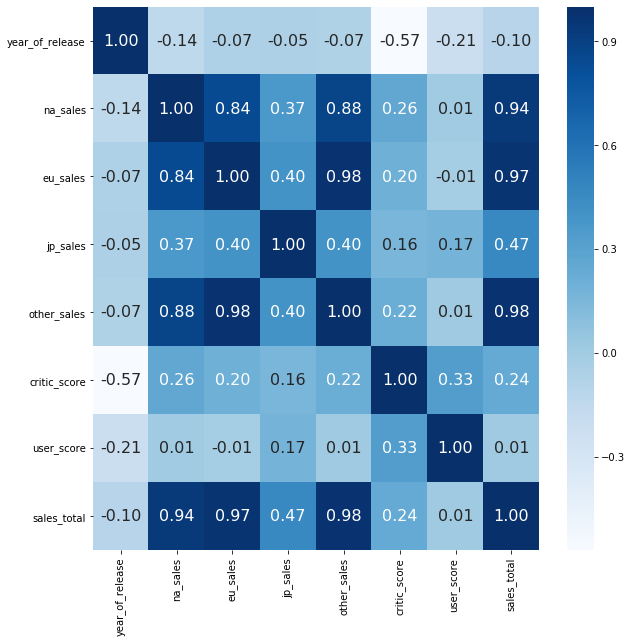

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(games_ps3.corr(), annot = True, cmap = "Blues", fmt = '.2f', annot_kws = {'size':16})

Рассмотрим только интересующие нас данные.

In [34]:
games_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]

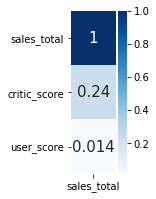

In [35]:
plt.figure(figsize = (1,3))
sns.heatmap(games_ps3_filtered.corr()[['sales_total']].sort_values(by = 'sales_total', ascending = False), cmap = "Blues", 
            annot = True, annot_kws = {'size':15})

Несмотря на мои предпочтения, обозначенные выше, всё же на продажи сильнее влияет оценка критиков, чем пользователей.
Есть предположение, что это связано с тем, что на момент выхода игры часть критиков уже написала на нее обзор, и на основании этого обзора пошла первая волна покупок игры. После чего появились обзоры геймеров и пошла вторая волна покупок игры, но она, очевидно, меньше.

Корреляция данных по топовым платформам (добавим к ранее составленному списку из 6 платформ `PS4` и `XOne`, так как они лидируют по продажам в наше время).

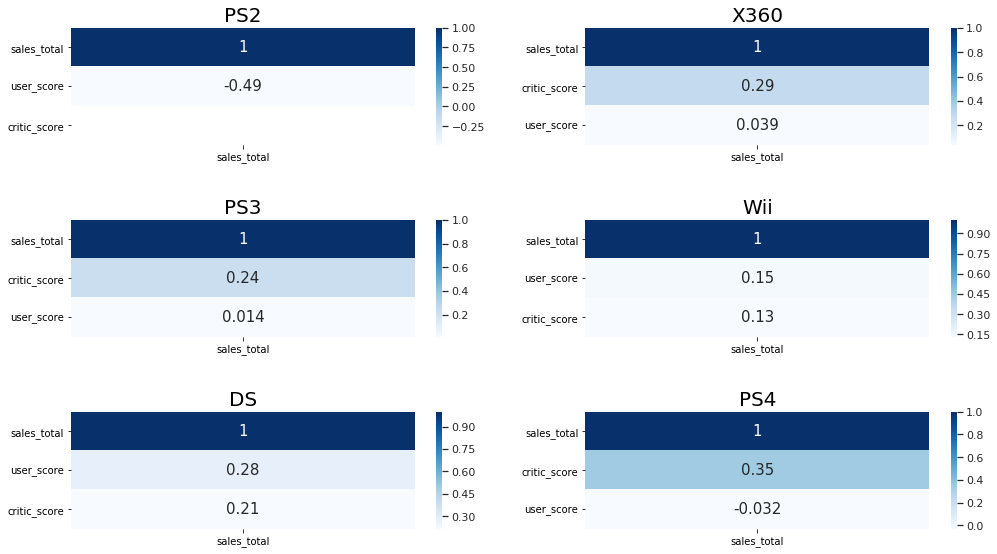

In [36]:
top_8_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XOne']

rows = len(top_8_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_8_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Blues", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму, в то время как по Wii и DS зависимость не такая большая.   
Из общей картины выбиваются PS4 и XOne с отрицательной корреляцией. Как предполагал выше - это, видимо, связано, с тем, что приставки довольно новые и пользователи ещё не успели дать оценку играм на них.   
Wii и DS имеют почти одинаковое влияние оценки критиков с оценкой пользователей. Скорее всего это связано с тем, что эти приставки азиатских производителей и большую популярность имеют там, следовательно много игроков и критиков не принимают участие в оценке игр на эти платформы.

[*(к содержанию)*](#back)
___

___
<a id = 'step_4'></a>
### Шаг 4. Портрет пользователя регионов NA, EU, JP
___
___


Определим для пользователя каждого региона (NA, EU, JP):

 - самые популярные платформы (топ-5), опишем различия в долях продаж;
 - самые популярные жанры (топ-5), поясним разницу;
 - определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Функция для прорисовки графиков:

In [37]:
def top_in_regions_plot(groupby, region_sales, ax, top_filter = 5):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:top_filter]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, rot=20)
    plot.legend(prop={'size':17})
    plot.title.set_size(20)
    plot.set_ylabel('Total sales, count', fontsize = 15)
    if groupby == 'platform':
        plot.set_xlabel('Platform', fontsize = 15)
    elif groupby == 'genre':
        plot.set_xlabel('Genre', fontsize = 15)
    else:
        plot.set_xlabel('ESRB_description', fontsize = 15)

___
**4.1. Топ платформ по регионам**
<a id = '4.1.'></a>

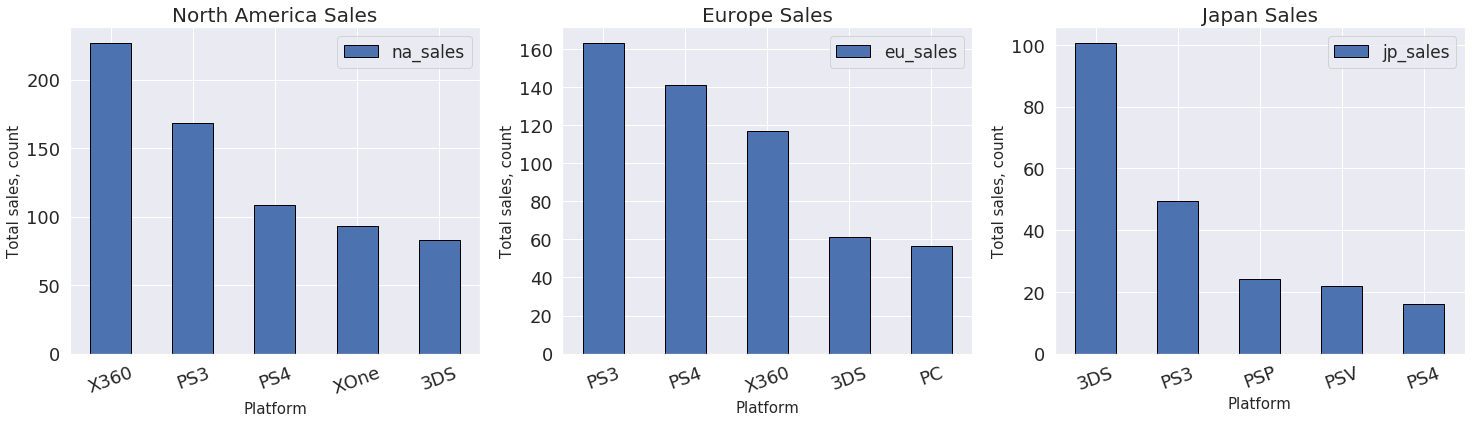

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке популярны приставки прошлого поколения X360 и PS2. Немного отстает Wii. Потом идут японские PS3 и DS соответственно.   
В Европе одинаково популярны PS2 и PS3. За ними X360, Wii и PS.   
В Японии всё наоборот. Лидер - японский DS. За ним американские PS и PS2. Далее чисто японские SNES и 3DS.

[*(к содержанию)*](#back)
___

___
**4.2. Топ жанров по регионам**
<a id = '4.2.'></a>

<a id = 'conc4'></a>

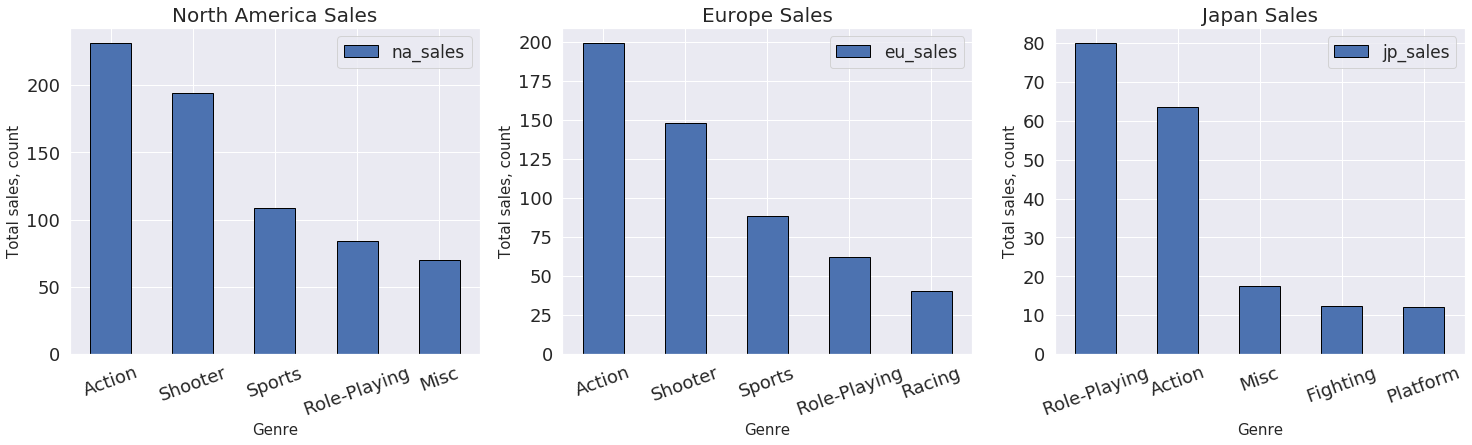

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Северной Америке и Европе очень схожая ситуация, за исключением того что в Америке предпочитают платформеры, а в Европе - гонки.
В Японии, как всегда, ролевые игры держат уверенное лидерство. Потом уже, с небольшим отставанием друг от друга - экшн, спортивные, платформеры и Misc.

[*(к содержанию)*](#back)
___

___
**4.3. Влияние рейтинга ESBR на продажи в отдельном регионе**
<a id = '4.3.'></a>

Для корректной оценки - добавим новый столбец с описанием рейтингов.

In [40]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'AO': 'Только для взрослых',
             'No rating' : 'Без рейтинга'}

In [41]:
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

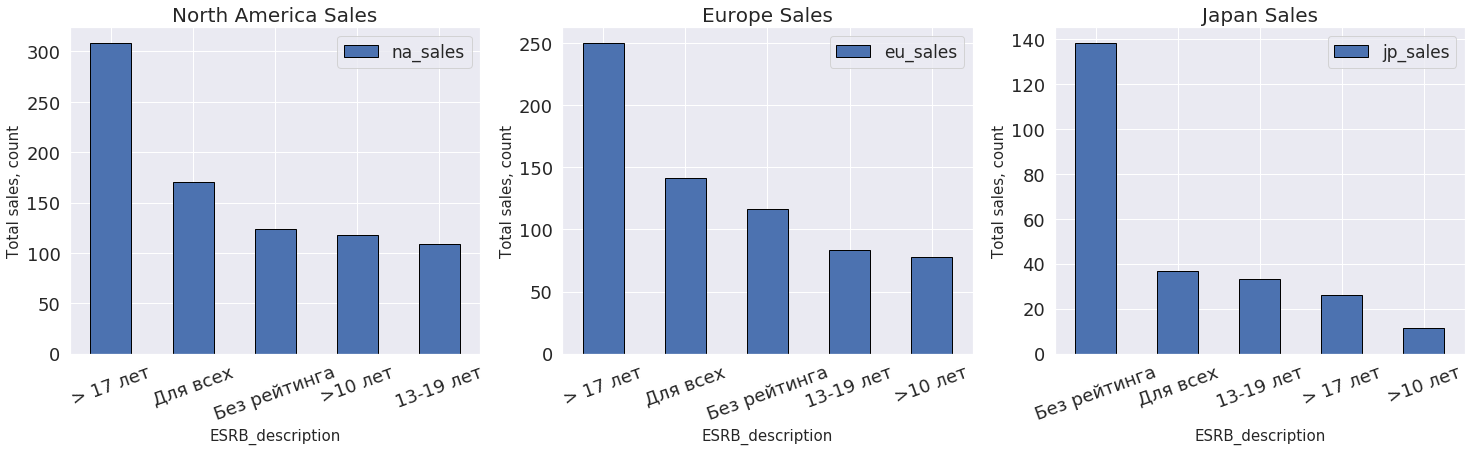

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0, 6)
top_in_regions_plot('ESRB_description', 'eu_sales', 1, 6)
top_in_regions_plot('ESRB_description', 'jp_sales', 2, 6)

<a id = 'conc1'></a>
В Северной Америке и в Европе картина практически одинаковая: большая часть выручки получено с игр с рейтингом "Для всех", поровну - с рейтингом "13-19 лет" и "для лиц старше 17 лет". При этом почти вровень с рейтингом "Для всех" идет рейтинг "Без рейтинга". Основной причиной этого может быть то, что в такую группу попадает множество игр разных жанров, поподающие под многие рейтинги, которые им пока, почему-то, не присвоены. Однако заниматься продажами таких игр считаю опасным, особенно в Америке, где однажды засудили Microsoft за фразу "откиньтесь на спинку и отдохните", а люди, сидящие на табуретках, падали))

В Японии первое место -  "Без рейтинга", потом с огромным отрывом "Для всех", и далее игры для лиц от 13 до 19 лет.

[*(к содержанию)*](#back)
___

___
<a id = 'step_5'></a>
### Шаг 5. Проверка гипотез
___
___

 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
 - средние пользовательские рейтинги жанров Action и Sports разные.  
 
 
Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05   

Н0 (нулевая гипотеза) всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.

___
**5.1. Средние пользовательские рейтинги Xbox One и PC**
<a id = '5.1.'></a>

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [43]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,ESRB_description
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,> 17 лет
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,> 17 лет
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,> 17 лет
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No rating,14.63,Без рейтинга
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No rating,14.60,Без рейтинга


In [44]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings, equal_var = False)

print('Дисперсия пользовательского рейтинга игр на Xbox One: {:.2f}'.format(statistics.variance(xbox_one_ratings)))
print('Дисперсия пользовательского рейтинга игр на PC: {:.2f}'.format(statistics.variance(pc_ratings)))

print('\nt = {}\np-value = {:.10e}'.format(stat, p))
print('\nalpha = 0.05')

Дисперсия пользовательского рейтинга игр на Xbox One: 1.91
Дисперсия пользовательского рейтинга игр на PC: 2.60

t = 0.5060666492177487
p-value = 6.1307122476e-01

alpha = 0.05


p-value < alpha   
Отвергаем нулевую гипотезу.   
Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

[*(к содержанию)*](#back)
___

___
**5.2. Cредние пользовательские рейтинги жанров Action и Sports**
<a id = '5.2.'></a>

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.   
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [45]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sport_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, sport_ratings, equal_var = False)

print('Дисперсия игр жанра Action: {:.2f}'.format(statistics.variance(action_ratings)))
print('Дисперсия игр жанра Sport: {:.2f}'.format(statistics.variance(sport_ratings)))

print('\nt = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

Дисперсия игр жанра Action: 1.81
Дисперсия игр жанра Sport: 2.88

t = 9.360735032170027
p-value = 0.0000

Пороговое значение alpha = 0.05


p-value > alpha  
Не можем отвергнуть нулевую гипотезу.   
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

[*(к содержанию)*](#back)
___

___
<a id = 'step_6'></a>
### Шаг 6. Общий вывод
___
___

"Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года."

Разумеется, в первую очередь надо знать на какой регион мы хотим выйти со своими продажами и строить политику исходя из предпочтений этого региона: подбирать игры под популярные платформы (и следить за их обновлением), соответствующего жанра и возрастной категории.

Так как самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков, а не пользователей (кроме того оценки критиков плучают раньше) - это стоит учитывать при прогнозах продаж.

[*(к содержанию)*](#back)
___